<a href="https://colab.research.google.com/github/wesslen/dsba6211-summer2024/blob/main/notebooks/dsba6211_summer2024_class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 2: Intro to scikit-learn

DSBA6211 (Summer 2024)

Ryan Wesslen

## What is `scikit-learn`?

-   Open source machine learning library
-   Supports both supervised and unsupervised learning
-   Provides tools for:
    -   Model fitting
    -   Data preprocessing
    -   Model selection
    -   Model evaluation
    -   Various utilities

------------------------------------------------------------------------

## What `scikit-learn` Does Not Do

-   Deep learning (use TensorFlow or PyTorch)
-   Reinforcement learning
-   Real-time prediction serving

------------------------------------------------------------------------

## Supervised vs Unsupervised Learning

### Supervised Learning

-   Models learn from labeled data
-   Predict outcomes based on input features
-   Examples:
    -   Classification (e.g., email spam detection)
    -   Regression (e.g., house price prediction)

------------------------------------------------------------------------

## Supervised vs Unsupervised Learning

### Unsupervised Learning

-   Models learn from unlabeled data
-   Discover patterns or structure in data
-   Examples:
    -   Clustering (e.g., customer segmentation)
    -   Dimensionality reduction (e.g., PCA)

------------------------------------------------------------------------

## Scikit-learn Workflow

1.  **Data Collection and Preparation**: Gather, clean data

2.  **Feature Engineering**: Select/transform features, standardize or
    normalize data

3.  **Model Selection**: Choose appropriate algorithm and use
    cross-validation to evaluate

4.  **Model Training**: Fit model to training data

5.  **Model Evaluation**: Evaluate model on test data

6.  **Model Tuning**: Optimize hyperparameters

7.  **Deployment**: Deploy model for real-world use

# Getting Started with `scikit-learn`

These next slides follow [this
guide](https://scikit-learn.org/stable/getting_started.html).

------------------------------------------------------------------------

## Installation

In [ ]:
!python -m pip install scikit-learn # typical way to install

**Q: How to find out the latest versions of `scikit-learn`?**

https://pypi.org/project/scikit-learn/

------------------------------------------------------------------------

## Example: Fitting an Estimator

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)

X = [[1, 2, 3], [11, 12, 13]]
y = [0, 1]

clf.fit(X, y)

RandomForestClassifier(random_state=0)

------------------------------------------------------------------------

## Fit Method Inputs

### Samples Matrix (X)

-   Size: (n_samples, n_features)
-   Rows: samples
-   Columns: features

### Target Values (y)

-   Regression: real numbers
-   Classification: integers or discrete values
-   Not needed for unsupervised learning
-   1D array

See the
[`.fit()`](https://scikit-learn.org/stable/glossary.html#term-fit)
glossary; notice there are related methods like `.fit_predict()` and
`.fit_transform()`.

------------------------------------------------------------------------

## Example: Predicting

In [ ]:
clf.predict(X)  # predict classes of the training data

array([0, 1])

<br>

. . .

In [ ]:
clf.predict([[4, 5, 6], [14, 15, 16]])  # predict classes of new data

array([0, 1])

<br>

. . .

In [ ]:
clf.predict_proba([[4, 5, 6], [14, 15, 16]]) # output predicted probabilities

array([[0.7 , 0.3 ],
       [0.22, 0.78]])

Q: How to convert from probabilities to hard predictions?

[Thresholding](https://scikit-learn.org/1.5/modules/classification_threshold.html)

------------------------------------------------------------------------

## Transformers and preprocessors

In [ ]:
from sklearn.preprocessing import StandardScaler
X = [[0, 15],
     [1, -10]]
# scale data with StandardScalar for Z transform
StandardScaler().fit(X).transform(X)

array([[-1.,  1.],
       [ 1., -1.]])

Check out [tutorial on different
scalars](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

------------------------------------------------------------------------

## Pipelines

In [ ]:
from sklearn.datasets import load_iris
# load the iris dataset and split it into train and test sets
X, y = load_iris(return_X_y=True)
type(X)

numpy.ndarray

<br>

In [ ]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

<br>

In [ ]:
y[0:5]

array([0, 0, 0, 0, 0])

------------------------------------------------------------------------

## Pipelines

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train.shape)

(112, 4)


<br>

In [ ]:
X_train[0:5]

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3]])

<br>

In [ ]:
y_train[0:5]

array([1, 1, 2, 0, 2])

------------------------------------------------------------------------

## Pipelines

![](https://learningds.org/_images/TrainTestDiagram.png)

[Chapter 16.2 Learning Data
Science](https://learningds.org/ch/16/ms_train_test.html)

------------------------------------------------------------------------

## Q: What role does the random seed play in partitioning?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train[0:2]

array([[6.5, 2.8, 4.6, 1.5],
       [6.7, 2.5, 5.8, 1.8]])

. . .

<br>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train[0:2]

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2]])

The
[`random_state`](https://scikit-learn.org/stable/glossary.html#term-random_state)
is also used in some estimators like the
[`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

------------------------------------------------------------------------

## Pipelines

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# create a pipeline object
pipe = make_pipeline(StandardScaler(),LogisticRegression())

# fit the whole pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

------------------------------------------------------------------------

## Pipelines

We can now predict on the pipeline

In [ ]:
X_test[0:5]

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2]])

<br>

In [ ]:
pipe.predict(X_test[0:5])

array([2, 1, 0, 2, 0])

------------------------------------------------------------------------

## Pipelines: metrics

Or we can also use that to calculate metrics like accuracy.

In [ ]:
from sklearn.metrics import accuracy_score
# we can now use it like any other estimator
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

------------------------------------------------------------------------

## Pipelines: metrics

There are many [other
metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values):

-   Classification: `balanced_accuracy`, `precision`, `recall`, `f1`,
    `f1_micro`, `f1_macro`, `roc_auc`
-   Regression: `r2`, `explained_variance`, `mean_squared_error`
-   Or you can create custom metrics too!

There are helpful tutorials on creating diagnostics tools like
[precision-recall
curves](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)

------------------------------------------------------------------------

## Model Evaluation: Cross-Validation

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

X, y = make_regression(n_samples=1000, noise=10, random_state=0)

lr = LinearRegression()

result = cross_validate(lr, X, y)  # defaults to 5-fold CV

result['test_score']  # r_squared score is high because dataset is easy

array([0.99602021, 0.99388108, 0.99537012, 0.99633561, 0.99526797])

------------------------------------------------------------------------

## Model Evaluation: Cross-Validation

![](https://learningds.org/_images/CVDiagram.png)

[Chapter 16.3 Learning Data
Science](https://learningds.org/ch/16/ms_cv.html)

**Q: What is cross-validation used for?**

------------------------------------------------------------------------

## Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=5,
                            param_distributions={'n_estimators': randint(1, 5),
                                                 'max_depth': randint(5, 10)},
                            random_state=0)

mod_cv = search.fit(X_train, y_train)

mod_cv.best_params_

{'max_depth': 9, 'n_estimators': 4}

<br>

In [ ]:
mod_cv.score(X_test, y_test)

0.9710365853658537

------------------------------------------------------------------------

## Avoiding Data Leakage

> In practice, you almost always want to search over a pipeline, instead
> of a single estimator. One of the main reasons is that if you apply a
> pre-processing step to the whole dataset without using a pipeline, and
> then perform any kind of cross-validation, you would be breaking the
> fundamental assumption of independence between training and testing
> data. Indeed, since you pre-processed the data using the whole
> dataset, some information about the test sets are available to the
> train sets. This will lead to over-estimating the generalization power
> of the estimator.

------------------------------------------------------------------------

## Tips on avoiding Data Leakage

1.  Always split the data into train and test subsets first,
    particularly before any preprocessing steps.

2.  Never include test data when using the `fit` and `fit_transform`
    methods. Using all the data, e.g., `fit(X)`, can result in overly
    optimistic scores.

3.  Conversely, the `transform` method should be used on both train and
    test subsets as the same preprocessing should be applied to all the
    data. This can be achieved by using `fit_transform` on the train
    subset and transform on the test subset.

# Logistic Regression, Regularization, and other Classifiers

------------------------------------------------------------------------

## Logistic Regression

-   Used to make class (category) predictions
-   Despite its name, it is implemented as a linear model for
    classification rather than regression
-   Sometimes referred to as logit regression, maximum-entropy
    classification (MaxEnt) or the log-linear classifier
-   Binary, One-vs-Rest, or multinomial logistic regression with
    optional l1, l2, or Elastic-Net regularization.
-   It is a special case of [Generalized Linear
    Models](https://scikit-learn.org/1.4/modules/linear_model.html#generalized-linear-models)
    with a Binomial/Bernoulli conditional distribution and a Logit link.

------------------------------------------------------------------------

## Why not Linear Regression?

-   For classification problems, linear regression is not the right
    approach as it will give too much weight to data far from the
    decision frontier.

-   A linear approach is to fit a sigmoid function or logistic function

------------------------------------------------------------------------

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train[:, :2], y_train) # only take first two features

logreg.coef_

array([[-36.46940519,  30.76898409],
       [ 17.15831856, -15.45041831],
       [ 19.31108663, -15.31856578]])

<br>

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(logreg.predict(X_test[:, :2]), y_test)

0.7631578947368421

------------------------------------------------------------------------

## Logistic Regression

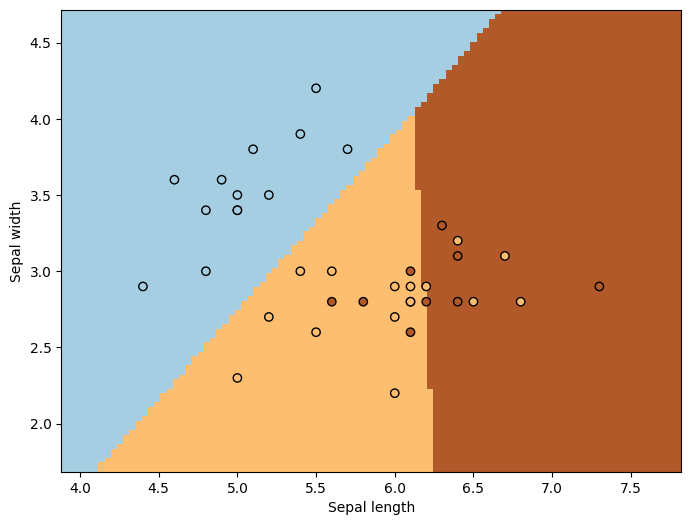

In [ ]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X_test[:, :2],
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)

plt.show()

------------------------------------------------------------------------

## What is the `C` parameter?

------------------------------------------------------------------------

## Regularization by default

By default, logistic regression in scikit-learn runs w L2 regularization
on and defaulting to magic number C=1.0. How many millions of
ML/stats/data-mining papers have been written by authors who didn't
report (& honestly didn't think they were) using regularization?

— Zachary Lipton (@zacharylipton)
<a href="https://twitter.com/zacharylipton/status/1167298276686589953?ref_src=twsrc%5Etfw">August
30, 2019</a>

[r y x r’s Scikit-learn’s defaults are wrong
blog](https://ryxcommar.com/2019/08/30/scikit-learns-defaults-are-wrong/)

------------------------------------------------------------------------

## Motivation

**Regularization**: add penalty to loss function for larger coefficients

-   this will induce small “bias” but reduce variance
-   which (typically) yields better out-of-sample prediction (aka lower
    overfitting)

------------------------------------------------------------------------

## Regularization

-   **Overfitting Problem**
    -   Occurs when the model learns noise in the training data.
    -   Leads to high accuracy on training data but poor generalization
        to new data.
-   **Bias-Variance Tradeoff**
    -   Aim to balance complexity and simplicity in the model.
    -   Regularization helps reduce variance without significantly
        increasing bias.

------------------------------------------------------------------------

## Benefits of Regularization

-   Improves model generalization to unseen data.
-   Prevents overfitting by penalizing large coefficients.
-   Helps in selecting relevant features (L1).

------------------------------------------------------------------------

## Types of Regularization

-   **L1 Regularization (Lasso)**
    -   Adds absolute value of magnitude of coefficients as penalty
        term.
    -   Encourages sparsity, leading to feature selection.
-   **L2 Regularization (Ridge)**
    -   Adds squared magnitude of coefficients as penalty term.
    -   Encourages small but non-zero coefficients, leading to more
        stable predictions.
-   **Elastic net** is a linear combination of both L1 and L2

------------------------------------------------------------------------

## Regularization: No regularization

In [ ]:
# same example with regularization
accuracy_score(logreg.predict(X_test[:, :2]), y_test)

0.7631578947368421

<br>

In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression with no regularization
logreg_noreg = LogisticRegression(C=0.01)

logreg_noreg.fit(X_train[:, :2], y_train)

accuracy_score(logreg_noreg.predict(X_test[:, :2]), y_test)

0.5789473684210527

The explanation of why is a bit challenging. *Recommend* this
[regularization
lesson](https://inria.github.io/scikit-learn-mooc/python_scripts/linear_models_regularization.html)
or [Chapter 16 in Learning Data
Science](https://learningds.org/ch/16/ms_regularization.html)

------------------------------------------------------------------------

## How to find the right C value?

This is where cross-validation (and GridSearch) is used!

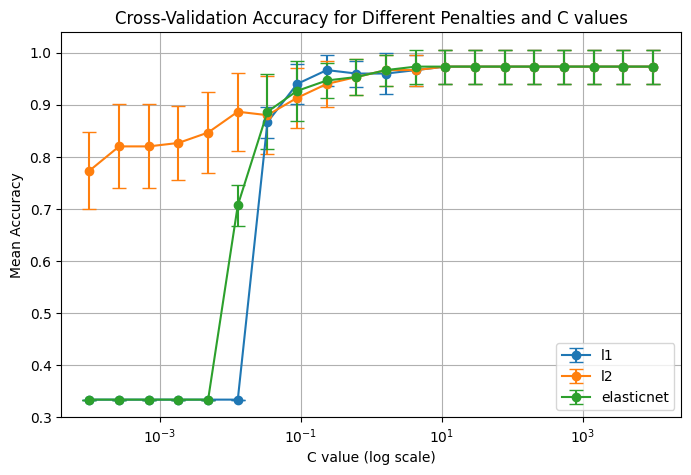

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create a pipeline that standardizes the data then applies Logistic Regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000, solver='saga'))

# Define the range of C values and penalty types to test
param_grid = {
    'logisticregression__C': np.logspace(-4, 4, 20),
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
    'logisticregression__l1_ratio': [0.5]  # Only used when penalty is 'elasticnet'
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best C parameter and penalty type
grid_search.fit(X, y)

# Get the results
results = grid_search.cv_results_

# Extract data for plotting
C_values = np.logspace(-4, 4, 20)
penalties = ['l1', 'l2', 'elasticnet']
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']
params = results['params']

# Organize the data by penalty
penalty_data = {penalty: ([], [], []) for penalty in penalties}

for mean, std, param in zip(mean_scores, std_scores, params):
    penalty = param['logisticregression__penalty']
    C = param['logisticregression__C']
    penalty_data[penalty][0].append(C)
    penalty_data[penalty][1].append(mean)
    penalty_data[penalty][2].append(std)

# Plotting
plt.figure(figsize=(8, 5))

for penalty, (C, mean, std) in penalty_data.items():
    if penalty is not None:
        label = penalty
    else:
        label = 'none'
    plt.errorbar(C, mean, yerr=std, label=label, capsize=5, marker='o')

plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Mean Accuracy')
plt.title('Cross-Validation Accuracy for Different Penalties and C values')
plt.legend()
plt.grid(True)
plt.show()